In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Import the KMeans module and matplotlib
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../Resources/marathon_results_2019.csv')
df.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,2,"Cherono, Lawrence",30,M,Eldoret,NaN,KEN,NaN,NaN,0:15:11,...,1:16:23,1:32:01,1:47:16,2:01:45,0:04:53,NaN,2:07:57,1,1,1
1,6,"Desisa, Lelisa",29,M,Ambo,NaN,ETH,NaN,NaN,0:15:10,...,1:16:24,1:32:01,1:47:16,2:01:46,0:04:53,NaN,2:07:59,2,2,2
2,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,KEN,NaN,NaN,0:15:14,...,1:16:24,1:32:01,1:47:16,2:01:45,0:04:54,NaN,2:08:07,3,3,3
3,8,"Kandie, Felix",32,M,Iten,NaN,KEN,NaN,NaN,0:15:14,...,1:16:24,1:32:01,1:47:16,2:02:08,0:04:55,NaN,2:08:54,4,4,4
4,11,"Kirui, Geoffrey",26,M,Keringet,NaN,KEN,NaN,NaN,0:15:12,...,1:16:23,1:32:01,1:47:16,2:01:57,0:04:56,NaN,2:08:55,5,5,5


In [3]:
# Subset the dataframe to only the columns "Age", "M/F", split times (i.e. "5K, 10K", etc.), "Pace", and "Official Time". 
df = df[['Age', 'M/F', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']]
df.head()

,Age,M/F,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time
0,30,M,0:15:11,0:30:21,0:45:48,1:01:16,1:04:29,1:16:23,1:32:01,1:47:16,2:01:45,0:04:53,2:07:57
1,29,M,0:15:10,0:30:22,0:45:46,1:01:16,1:04:30,1:16:24,1:32:01,1:47:16,2:01:46,0:04:53,2:07:59
2,34,M,0:15:14,0:30:22,0:45:47,1:01:17,1:04:31,1:16:24,1:32:01,1:47:16,2:01:45,0:04:54,2:08:07
3,32,M,0:15:14,0:30:24,0:45:47,1:01:16,1:04:31,1:16:24,1:32:01,1:47:16,2:02:08,0:04:55,2:08:54
4,26,M,0:15:12,0:30:21,0:45:46,1:01:15,1:04:28,1:16:23,1:32:01,1:47:16,2:01:57,0:04:56,2:08:55


In [4]:
# Conv# Convert the split times, "Pace", and "Official Time" to timedeltas using apply() and pandas.to_timedelta()
time_columns = ['5K', '10K', '15K', '20K', 'Half','25K', '30K', '35K', '40K', 'Pace', 'Official Time']

# code added to replace "-" with "" in the time_columns columns
df[time_columns] = df[time_columns].replace("-", "")

# using apply() and pandas.to_timedelta() to convert hh:mm:ss formate timedeltas 
df[time_columns] = df[time_columns].apply(pd.to_timedelta)
df.head()

,Age,M/F,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time
0,30,M,0 days 00:15:11,0 days 00:30:21,0 days 00:45:48,0 days 01:01:16,0 days 01:04:29,0 days 01:16:23,0 days 01:32:01,0 days 01:47:16,0 days 02:01:45,0 days 00:04:53,0 days 02:07:57
1,29,M,0 days 00:15:10,0 days 00:30:22,0 days 00:45:46,0 days 01:01:16,0 days 01:04:30,0 days 01:16:24,0 days 01:32:01,0 days 01:47:16,0 days 02:01:46,0 days 00:04:53,0 days 02:07:59
2,34,M,0 days 00:15:14,0 days 00:30:22,0 days 00:45:47,0 days 01:01:17,0 days 01:04:31,0 days 01:16:24,0 days 01:32:01,0 days 01:47:16,0 days 02:01:45,0 days 00:04:54,0 days 02:08:07
3,32,M,0 days 00:15:14,0 days 00:30:24,0 days 00:45:47,0 days 01:01:16,0 days 01:04:31,0 days 01:16:24,0 days 01:32:01,0 days 01:47:16,0 days 02:02:08,0 days 00:04:55,0 days 02:08:54
4,26,M,0 days 00:15:12,0 days 00:30:21,0 days 00:45:46,0 days 01:01:15,0 days 01:04:28,0 days 01:16:23,0 days 01:32:01,0 days 01:47:16,0 days 02:01:57,0 days 00:04:56,0 days 02:08:55


In [5]:
# Convert timedeltas to seconds by applying the lambda function lambda x: x.dt.total_seconds()
df[time_columns] = df[time_columns].apply(lambda x: x.dt.total_seconds())
df.head()

,Age,M/F,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time
0,30,M,911.0,1821.0,2748.0,3676.0,3869.0,4583.0,5521.0,6436.0,7305.0,293.0,7677.0
1,29,M,910.0,1822.0,2746.0,3676.0,3870.0,4584.0,5521.0,6436.0,7306.0,293.0,7679.0
2,34,M,914.0,1822.0,2747.0,3677.0,3871.0,4584.0,5521.0,6436.0,7305.0,294.0,7687.0
3,32,M,914.0,1824.0,2747.0,3676.0,3871.0,4584.0,5521.0,6436.0,7328.0,295.0,7734.0
4,26,M,912.0,1821.0,2746.0,3675.0,3868.0,4583.0,5521.0,6436.0,7317.0,296.0,7735.0


In [6]:
# Subset df to only rows where the split values are non-zero
df = df[
    (df['5K'] != 0) & 
    (df['10K'] != 0) & 
    (df['15K'] != 0) & 
    (df['20K'] != 0) & 
    (df['Half'] != 0) & 
    (df['25K'] != 0) & 
    (df['30K'] != 0) & 
    (df['35K'] != 0) & 
    (df['40K'] != 0)
]

# A more concise method
#df[~(df == 0).any(axis=1)]

df.head()

,Age,M/F,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time
0,30,M,911.0,1821.0,2748.0,3676.0,3869.0,4583.0,5521.0,6436.0,7305.0,293.0,7677.0
1,29,M,910.0,1822.0,2746.0,3676.0,3870.0,4584.0,5521.0,6436.0,7306.0,293.0,7679.0
2,34,M,914.0,1822.0,2747.0,3677.0,3871.0,4584.0,5521.0,6436.0,7305.0,294.0,7687.0
3,32,M,914.0,1824.0,2747.0,3676.0,3871.0,4584.0,5521.0,6436.0,7328.0,295.0,7734.0
4,26,M,912.0,1821.0,2746.0,3675.0,3868.0,4583.0,5521.0,6436.0,7317.0,296.0,7735.0


In [7]:
# Use LabelEncoder to convert 'M/F' into integer labels
df['M/F'] = LabelEncoder().fit_transform(df['M/F'])

# Equivalently, the encoder can be created and applied in two steps
# encoder = LabelEncoder().fit(df['M/F'])
# df['M/F'] = encoder.transform(df['M/F'])

df.head()

,Age,M/F,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time
0,30,1,911.0,1821.0,2748.0,3676.0,3869.0,4583.0,5521.0,6436.0,7305.0,293.0,7677.0
1,29,1,910.0,1822.0,2746.0,3676.0,3870.0,4584.0,5521.0,6436.0,7306.0,293.0,7679.0
2,34,1,914.0,1822.0,2747.0,3677.0,3871.0,4584.0,5521.0,6436.0,7305.0,294.0,7687.0
3,32,1,914.0,1824.0,2747.0,3676.0,3871.0,4584.0,5521.0,6436.0,7328.0,295.0,7734.0
4,26,1,912.0,1821.0,2746.0,3675.0,3868.0,4583.0,5521.0,6436.0,7317.0,296.0,7735.0


In [8]:
# Convert 'Age' to a numeric value
df['Age'] = pd.to_numeric(df['Age'])

In [9]:
# drop na using dropna method
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24169 entries, 0 to 26642
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            24169 non-null  int64  
 1   M/F            24169 non-null  int32  
 2   5K             24169 non-null  float64
 3   10K            24169 non-null  float64
 4   15K            24169 non-null  float64
 5   20K            24169 non-null  float64
 6   Half           24169 non-null  float64
 7   25K            24169 non-null  float64
 8   30K            24169 non-null  float64
 9   35K            24169 non-null  float64
 10  40K            24169 non-null  float64
 11  Pace           24169 non-null  float64
 12  Official Time  24169 non-null  float64
dtypes: float64(11), int32(1), int64(1)
memory usage: 2.5 MB


<AxesSubplot:xlabel='Pace', ylabel='Official Time'>

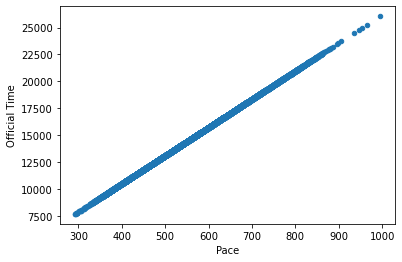

In [10]:
# 'Pace' should be perfectly correlated with 'Official Time', so we'll remove it from our X data (but keep it for analysis)
# Plot a scatter plot of 'Pace' against 'Official Time'
df.plot(kind='scatter', x='Pace', y='Official Time')

In [11]:
# Create a training set 'X' with every column except 'Pace'
X = df.drop('Pace', axis=1)

# Alternatively, select all the columns to keep
#X = df[['Age', 'M/F','5K','10K','15K','20K','25K','30K','35K','40K','Half','Official Time']]

In [12]:
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[1.84615385e-01, 1.00000000e+00, 2.84399833e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.69230769e-01, 1.00000000e+00, 2.80217482e-02, ...,
        0.00000000e+00, 5.79072326e-05, 1.08843537e-04],
       [2.46153846e-01, 1.00000000e+00, 2.96946884e-02, ...,
        0.00000000e+00, 0.00000000e+00, 5.44217687e-04],
       ...,
       [5.07692308e-01, 1.00000000e+00, 6.03094939e-01, ...,
        9.84187267e-01, 9.51705368e-01, 9.42965986e-01],
       [4.30769231e-01, 0.00000000e+00, 6.15641991e-01, ...,
        9.93509184e-01, 9.56453761e-01, 9.56734694e-01],
       [3.69230769e-01, 1.00000000e+00, 3.26641573e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

### Part 2: Perform KMeans Clustering

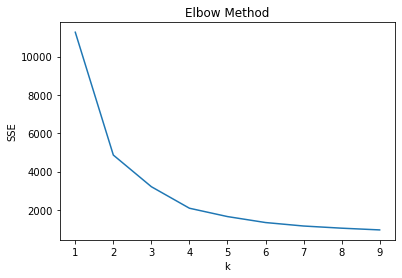

In [13]:
# Test out KMeans models with k from 1 through 9
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [14]:
# Create a KMeans model with 3 clusters
### YOUR CODE HERE

In [15]:
# Calculate predicted values.
### YOUR CODE HERE

In [16]:
# Add prediected values onto the original dataframe
### YOUR CODE HERE

In [17]:
# Plot boxplots of the official time distributions by cluster
### YOUR CODE HERE

In [18]:
# Print out summary statistics of ages by M/F and Cluster
### YOUR CODE HERE

In [19]:
# Create a function that takes in gender and age and assigns an age group based on the following break points for each gender:
# * The lowest 1st quartile
# * Each median
# * The highest 3rd quartile
### YOUR CODE HERE

In [20]:
# Apply the custom age group to the original data frame and save it to the column 'Age Group'
### YOUR CODE HERE